Given data set



In [ ]:
#Let us import some packages.
import pandas as pnd
import numpy as npy

we use pandas read_csv function to read the csv file in python and pandas DataFrame method to convert the file into the dataframe.

In [ ]:
import matplotlib.pyplot as pltp
import seaborn as sbn

%matplotlib inline

We use 'matplotlib.pyplot' function to do and analysis using piechat,barchat,histograms like that.

In [ ]:
DataFrame=pnd.DataFrame(pnd.read_csv('/content/train (1).csv'))
DataFrame.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
DataFrame.shape

(891, 12)

It shows the number of rows and columns in the given data set.

In [ ]:
DataFrame.size

10692

'DataFrame.size' method returns us the total number of elemnts in the DataFrame.

In [ ]:
DataFrame.ndim

2

'DataFrame.ndim' method is used here to find the dimension of the given data set.so that only we can perform some analyses.

In [ ]:
DataFrame.index 

RangeIndex(start=0, stop=891, step=1)

Here the 'DataFrame.index' method is used to find the total number of persons travelled.It says that there are 891 peoples had travelled there.

In [ ]:
DataFrame.values

array([[1, 0, 3, ..., 7.25, nan, 'S'],
       [2, 1, 1, ..., 71.2833, 'C85', 'C'],
       [3, 1, 3, ..., 7.925, nan, 'S'],
       ...,
       [889, 0, 3, ..., 23.45, nan, 'S'],
       [890, 1, 1, ..., 30.0, 'C148', 'C'],
       [891, 0, 3, ..., 7.75, nan, 'Q']], dtype=object)

Let us create a barchat and make some analysis.

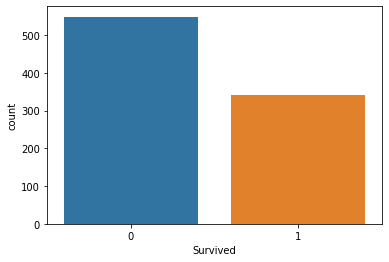

In [ ]:
sbn.countplot(data=DataFrame , x='Survived');

'0' means False.That is the person does not survived.
'1' means True.That is the person survived.

So,this barchat clearly showing that by analysis,found that,majority of the people or maximum people travelled was not survived or dead.and only minimum number of peoples was survived.

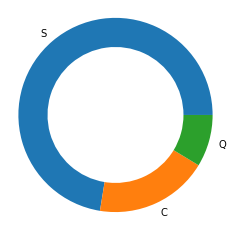

In [ ]:
sorted_counts = DataFrame['Embarked'].value_counts()
pltp.pie(sorted_counts, labels=sorted_counts.index, wedgeprops = {'width' : 0.3});
pltp.axis('square');

This histogram clearly tells that very large people had travelled to 'Southampton' and very less people travelled to 'Queenstown'.And moderate people travelled to 'Cherbourg'.

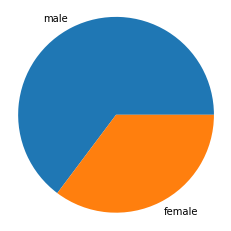

In [ ]:
sorted_counts=DataFrame['Sex'].value_counts()
pltp.pie(sorted_counts, labels = sorted_counts.index)
pltp.axis('square');

This piechart explains us that majority people travelled are male,as compared to proportion of female.

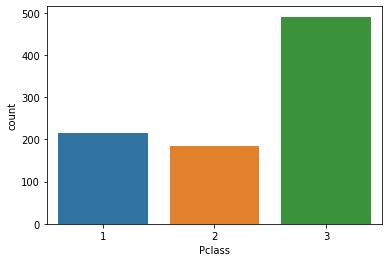

In [ ]:
sbn.countplot( data = DataFrame, x ='Pclass');

Let us make an analyses based on age of the people travelled

(array([24.,  6., 14.,  3.,  7.,  8.,  6.,  3.,  7., 22., 13., 51., 40.,
        27., 46., 24., 36., 47., 27., 35., 17., 34., 29., 11., 27.,  8.,
        18.,  9., 17., 18.,  6., 17.,  6.,  9.,  7.,  2.,  7.,  4.,  7.,
         4.,  3.,  1.,  0.,  2.,  3.,  0.,  1.,  0.,  0.,  1.]),
 array([ 0.42  ,  2.0116,  3.6032,  5.1948,  6.7864,  8.378 ,  9.9696,
        11.5612, 13.1528, 14.7444, 16.336 , 17.9276, 19.5192, 21.1108,
        22.7024, 24.294 , 25.8856, 27.4772, 29.0688, 30.6604, 32.252 ,
        33.8436, 35.4352, 37.0268, 38.6184, 40.21  , 41.8016, 43.3932,
        44.9848, 46.5764, 48.168 , 49.7596, 51.3512, 52.9428, 54.5344,
        56.126 , 57.7176, 59.3092, 60.9008, 62.4924, 64.084 , 65.6756,
        67.2672, 68.8588, 70.4504, 72.042 , 73.6336, 75.2252, 76.8168,
        78.4084, 80.    ]),
 <a list of 50 Patch objects>)

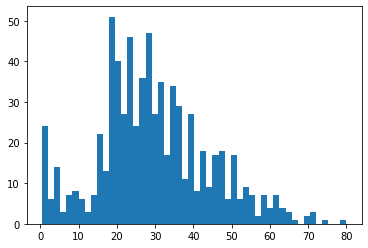

In [ ]:
pltp.hist(data=DataFrame,x='Age',bins=50)

So,We can here see that the passengers at age range of 28 to 30 is majority,That is many of the people are at age range of 28 to 31.

Next,we shall find the family size of the each person,that can be done by adding the columns 'sibsp' and 'parch' and make them a separate column,becuase 'sibsp' refers to the siblings and spouses abroad,and 'parch' refers to the parents and children abroad,so the code be,

In [ ]:
DataFrame['Family_size'] = DataFrame['SibSp']+DataFrame['Parch']
DataFrame.drop(['SibSp','Parch'], axis=1, inplace = True)
DataFrame.corr()

,PassengerId,Survived,Pclass,Age,Fare,Family_size
PassengerId,1.000000,-0.005007,-0.035144,0.036847,0.012658,-0.040143
Survived,-0.005007,1.000000,-0.338481,-0.077221,0.257307,0.016639
Pclass,-0.035144,-0.338481,1.000000,-0.369226,-0.549500,0.065997
Age,0.036847,-0.077221,-0.369226,1.000000,0.096067,-0.301914
Fare,0.012658,0.257307,-0.549500,0.096067,1.000000,0.217138
Family_size,-0.040143,0.016639,0.065997,-0.301914,0.217138,1.000000


Yes,we can see that the correlance between alone and survival rate is less.

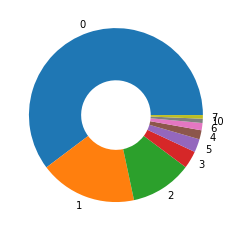

In [ ]:
sorted_counts = DataFrame['Family_size'].value_counts()
pltp.pie(sorted_counts, labels = sorted_counts.index, wedgeprops = {'width' : 0.6});

This piechart clearly says that majority of people travelled alone.

# DEALING WITH NULL VALUES:

In [ ]:
DataFrame.isnull().any().sum()

3

It shows that 3 columns that have the null values in it.

Null values are which the columns are rows in the data frame may be null or not containing any value...so we can leave that column or row simply or fill them with some values...it is called dealing with null values...

In [ ]:
DataFrame.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
Ticket           0
Fare             0
Cabin          687
Embarked         2
Family_size      0
dtype: int64

Let us have a look at the column that has null values more than 50% in the dataframe with us.

DataFrame.isnull().sum() code returns the pandas series with column name as the label index.
And the count of the total null values in its as the value for it.
We are counting only the column that have null values more than 50%.

In [ ]:
drop_col = DataFrame.isnull().sum()[DataFrame.isnull().sum() > (50/100 * DataFrame.shape[0])]
drop_col

Cabin    687
dtype: int64

**NOTE**: There is no certain number to after that we should drop the column.We can drop the column whichever we want or whatever we decided. 

In [ ]:
drop_col.index

Index(['Cabin'], dtype='object')

In [ ]:
DataFrame.drop(drop_col.index, axis=1, inplace=True)
DataFrame.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
Ticket           0
Fare             0
Embarked         2
Family_size      0
dtype: int64

In [ ]:
DataFrame.fillna(DataFrame.mean(), inplace = True)
DataFrame.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
Ticket         0
Fare           0
Embarked       2
Family_size    0
dtype: int64

**Next,**We are going to see the details about the column **'Embarked'**,becuase numbers have mean value,wile the strings or letters not have,so embarked have strings and numbers separate from other columns,

In [ ]:
DataFrame['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

Out of this column that have 889 entries,shall we see about the null values in it, 

In [ ]:
DataFrame.isnull().sum()['Embarked']

2

Yes,there is only 2 entries are null,so we shall it with the major value,no problem at that filling

In [ ]:
DataFrame['Embarked'].fillna('S', inplace = True)
DataFrame.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
Ticket         0
Fare           0
Embarked       0
Family_size    0
dtype: int64

In [ ]:
#We can see here that all the nullvalues have been filled.
#This is called such dealing with null values.

In [ ]:
DataFrame.corr()
#corr() method is used to find the correlance between certain column.

,PassengerId,Survived,Pclass,Age,Fare,Family_size
PassengerId,1.000000,-0.005007,-0.035144,0.033207,0.012658,-0.040143
Survived,-0.005007,1.000000,-0.338481,-0.069809,0.257307,0.016639
Pclass,-0.035144,-0.338481,1.000000,-0.331339,-0.549500,0.065997
Age,0.033207,-0.069809,-0.331339,1.000000,0.091566,-0.248512
Fare,0.012658,0.257307,-0.549500,0.091566,1.000000,0.217138
Family_size,-0.040143,0.016639,0.065997,-0.248512,0.217138,1.000000


Shall we have a look at the relation between survival rate and person is alone or with family,

In [ ]:
DataFrame['Alone']=[0 if DataFrame['Family_size'][i]>0 else 1 for i in DataFrame.index]
DataFrame.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Family_size,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0,1


Let see the count of people travel alone.

In [ ]:
DataFrame.groupby(['Alone'])['Survived'].mean()

Alone
0    0.505650
1    0.303538
Name: Survived, dtype: float64

This analysis says that if a person is travelling alone,then he has the lesser chance of survival,may be this is due to the reason that,person travelling alone will travel at cheaper class and person travel with family may travel in high class or rich class like that.

In [ ]:
DataFrame[['Alone','Fare']].corr()

,Alone,Fare
Alone,1.000000,-0.271832
Fare,-0.271832,1.000000


Hence this correlance proving us that,the chance for higher price of ticket or fare is high,when a person is not travelling alone or travelling with family.

So next,we shall have a look at relation between sex and survival rate,that is checking if the higher survival rate for male or female.

In [ ]:
DataFrame['Sex']=[0 if DataFrame['Sex'][i]=='male' else 1 for i in DataFrame.index]
#returns 0 if male 
#returns 1 if female
DataFrame.groupby(['Sex'])['Survived'].mean()

Sex
0    0.188908
1    0.742038
Name: Survived, dtype: float64

Here we can see that the female passengers have the more chance of survival than male.

So,next we shall see about the details that survival rate based on the 'Embarked'.

In [ ]:
DataFrame.groupby(['Embarked'])['Survived'].mean()


Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

This analysis clearly sowing that people traveled to 'Cherbourg' has the higher chance of survival.

CONCLUSION:


1. People travelling in rich class has higher chance of survival.Partiality may be done at saving the passengers.   
2. The female passengers have the higher survival chance.
3. People travelled with family has the higher chance of survival. 
4. Passengers those travelled to 'cherbourg' survived more as compared to others.
5. Majority of people boarded through to 'S'.
6. During this event,Large number of people was not survived(died) in proportion as compared to survived people.
7. Very less people travelled at '1 Pclass'.And large people travelled at '3 Pclass'.
8. The majority people are male in that ship as compared to strenth of female proportion.
9. The most of the people travelled have their age range of 27 to 30.
10. Majority of people boarded alone through the ship.




